#**The Sparks Foundation (TSF)- Internship Tasks**

#**Intern Name: Mohammed Shoaib Shaikh**
## **Task3 -To Explore Unsupervised Machine Learning:K-means Clustering**

In this task,we will use the iris dataset,to predict the optimum number of clusters and represent it visually


## Importing Libraries 

In [14]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import plotly.express as ex


## Loading Iris Data

In [15]:
iris = datasets.load_iris()


In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##Creating DataFrame Object

In [17]:
dataframe= pd.DataFrame(iris.data, columns =iris.feature_names)

In [18]:
dataframe["Species"]= iris.target

In [19]:
dataframe["Species"] = dataframe["Species"].apply(lambda x: iris.target_names[x])

In [20]:
dataframe["Species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [26]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#**Applying KMeans Clustring Algorithm**

Using elbow methods to find out the effective number of clusters


In [31]:
#Calculating the value of WCSS(Within cluster sum of squares)
from sklearn.cluster import KMeans
X = dataframe.drop(labels=["Species"], axis=1).values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init ='k-means++', n_init =10, max_iter =300, n_jobs=-1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    


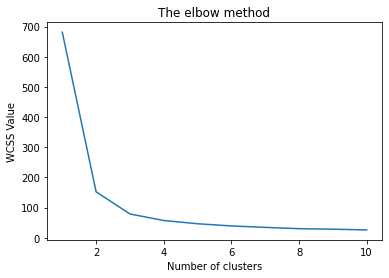

In [33]:
#Plotting the results of the elbow method
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')
plt.show()

From above plot of Elbow method it is clear that the effective number of clusters to be used for the clustering of the dataset is three

In [34]:
# Applying k-means cluster Algorithm
kmeans = KMeans(n_clusters = 3, init = 'k-means++',n_init = 10,max_iter = 300)
y_kmeans = kmeans.fit_predict(X)

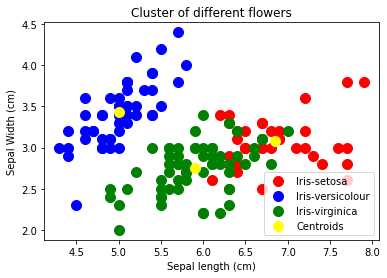

In [38]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Cluster of different flowers')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [43]:
#3d Plot
ex.scatter_3d(dataframe, "sepal length (cm)", "sepal width (cm)", "petal width (cm)", color="Species")